In [1]:
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
A1 = pd.read_excel("C:\\Users\\SMFL-09533\\Desktop\\Codes\\Online Retail.xlsx")

In [3]:
A1.head()
#looking at top 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
A1.shape
#checking the no of rows and columns

(541909, 8)

In [6]:
A1.info()
#looking out overall information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
A1.isnull().sum()
# checking the number of missing values in each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
A1.duplicated().sum()
# count of duplicated rows in the data

5268

In [13]:
A1 = A1[~A1.duplicated()]
# removing the duplicate rows

In [14]:
A1.shape

(536641, 8)

In [16]:
A1[A1['InvoiceNo'].str.startswith('C')==True]
# these are the transactions that have negative quantity which indicates returned or cancelled orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
A1 = A1[A1['InvoiceNo'].str.startswith('C')!=True]
A1.shape
# removing all the invoice number who starts with 'C' as they are returned orders

(527390, 8)

In [18]:
A1.InvoiceNo.nunique()
# checking the number of unique transactions
# though there are more than 5 lakh entries but the number of transaction happened is 21892

22064

In [19]:
A1.StockCode.nunique()
# checking the unique stock ids in the data or number of unqiue item sold by retailer

4059

In [20]:
A1.StockCode.value_counts().head(10)
# top 10 stock ids that sold the most

85123A    2259
85099B    2112
22423     2012
47566     1700
20725     1582
84879     1477
22197     1418
22720     1396
21212     1352
22383     1307
Name: StockCode, dtype: int64

In [21]:
A1.Quantity.describe()
# looking at the distribution of the quantity
# we seen that there is negative value which might indicate return orders

count    527390.000000
mean         10.311272
std         160.367285
min       -9600.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [22]:
A1[A1['Quantity']<0]
# looking at the data where quantity is negative and possible explanation is these are return orders or cancelled order

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [23]:
A1 = A1[A1['Quantity']>=0]
A1.shape
# keeping only those transactions that have successfully ordered

(526054, 8)

In [24]:
print('The minimum date is:',A1.InvoiceDate.min())
print('The maximum date is:',A1.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


In [27]:
A1.UnitPrice.describe()
# checking the distribution of unit price

count    526054.000000
mean          3.871747
std          42.016560
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [28]:
A1.Country.value_counts(normalize=True)
# we see that more than 90% have country as UK which is obvious as the retailer is UK based

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [29]:
A1['Country'] = A1['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
A1.Country.value_counts(normalize=True)
# putting UK as one country and combine rest countries into one category

United Kingdom    0.914627
Others            0.085373
Name: Country, dtype: float64

In [31]:
# checking the number of unique item list
A1.Description.nunique()

4077

In [32]:
# there are cases where the descriptions contains some code/name which are not directly refers to sales
# checking the data where description = ? and it is noted that customerid is NaN and unit price is 0
A1[A1['Description'].str.startswith('?')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom
282882,561665,22171,?,142,2011-07-28 16:55:00,0.0,NaN,United Kingdom
323315,565288,23135,?,101,2011-09-02 11:43:00,0.0,NaN,United Kingdom
421093,572920,72803A,?,117,2011-10-26 16:52:00,0.0,NaN,United Kingdom


In [33]:
# removing all the above entries
A1 = A1[A1['Description'].str.startswith('?')!=True]
A1.shape

(526048, 8)

In [34]:
# checking the data where description = * and it is noted that customerid is NaN
A1[A1['Description'].str.startswith('*')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom


In [35]:
# replacing with appropriate name
A1['Description'] = A1['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))

In [36]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
A1[A1['Description'].str.islower()==True]['Description'].value_counts()

check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
taig adjust                             2
returned                                2
test                                    2
wrongly marked 23343                    1
michel oops                             1
wrongly coded 20713                     1
wrongly marked                          1
wrongly coded 23343                     1
damaged                                 1
amazon adjust                           1
dotcomstock                             1
dotcom adjust                           1
website fixed                           1
allocate stock for dotcom orders ta     1
found box                               1
for online retail orders                1
add stock to allocate online order

In [37]:
# removing all the above noises
A1 = A1[A1['Description'].str.islower()!=True]
A1.shape

(525920, 8)

In [38]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
A1[A1['Description'].str.istitle()==True]['Description'].value_counts()

Manual                                 323
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Found                                    8
Dotcomgiftshop Gift Voucher £10.00       8
Dotcomgiftshop Gift Voucher £30.00       7
Amazon                                   7
Dotcomgiftshop Gift Voucher £50.00       4
Dotcomgiftshop Gift Voucher £40.00       3
High Resolution Image                    3
Adjustment                               2
Dotcomgiftshop Gift Voucher £100.00      1
Amazon Adjustment                        1
John Lewis                               1
Name: Description, dtype: int64

In [40]:
# removing all the above listed noises
A1 = A1[A1['Description'].str.istitle()!=True]
A1.shape

(525452, 8)

In [41]:
A1['Description'] = A1['Description'].str.strip()

In [42]:
# count of unique customer
A1.CustomerID.nunique()

4335

In [43]:
# checking where customer id is null
A1[A1.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [44]:
# removing entries where customer id is null
A1 = A1[~A1.CustomerID.isnull()]
A1.shape

(392353, 8)

In [45]:
A1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392353 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392353 non-null  object        
 1   StockCode    392353 non-null  object        
 2   Description  392353 non-null  object        
 3   Quantity     392353 non-null  int64         
 4   InvoiceDate  392353 non-null  datetime64[ns]
 5   UnitPrice    392353 non-null  float64       
 6   CustomerID   392353 non-null  float64       
 7   Country      392353 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [47]:
A1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# EDA

In [48]:
# creating some columns for exploratory

A1['Amount'] = A1['Quantity']*A1['UnitPrice']
A1['year'] = A1['InvoiceDate'].dt.year
A1['month'] = A1['InvoiceDate'].dt.month
A1['day'] = A1['InvoiceDate'].dt.day
A1['hour'] = A1['InvoiceDate'].dt.hour
A1['day_of_week'] = A1['InvoiceDate'].dt.dayofweek

In [49]:
A1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


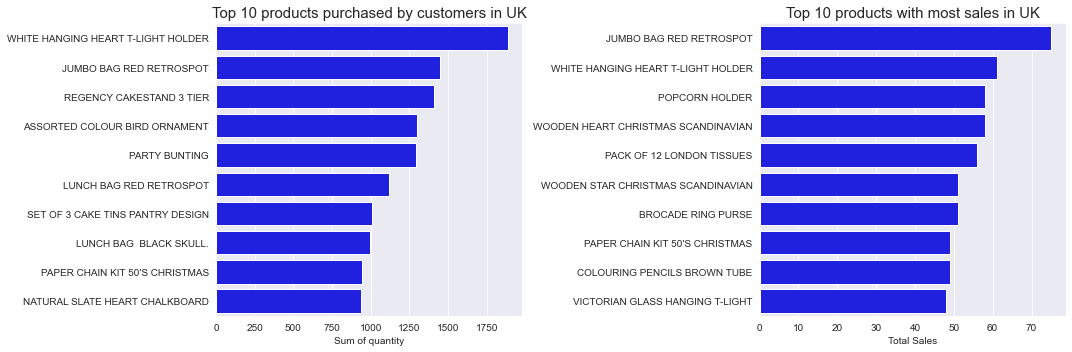

In [51]:
column = ['InvoiceNo','Amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = A1[A1['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = A1[A1['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='blue')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()


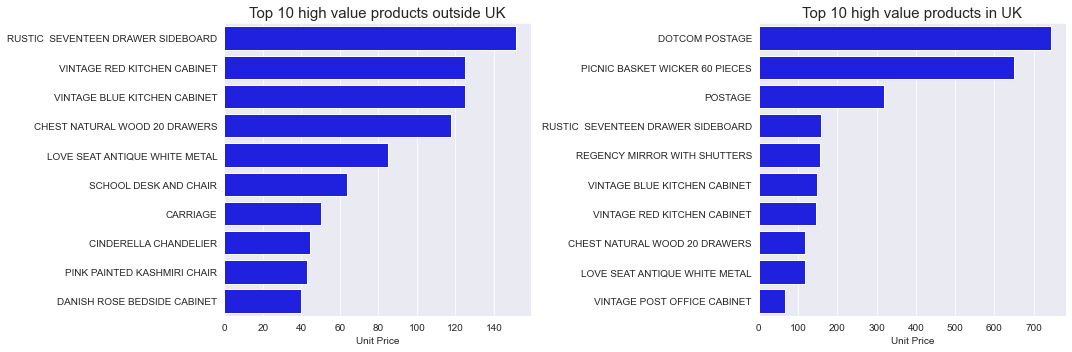

In [52]:
column = ['Others','United Kingdom']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = A1[A1['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).values,
                y = A1[A1['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).index,
                color='blue')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products outside UK',size=15)
    else:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products in UK',size=15)
        
plt.tight_layout()
plt.show()

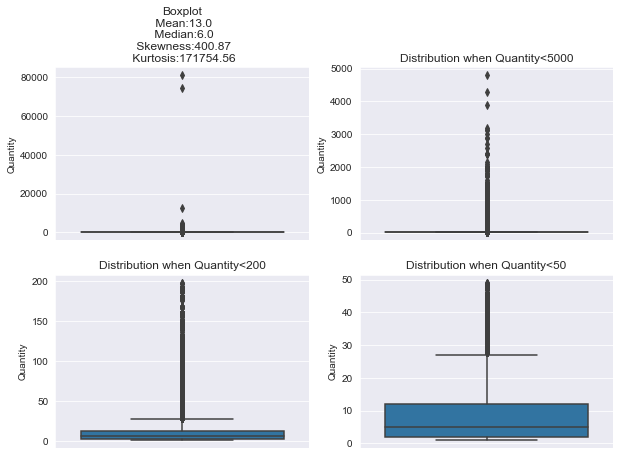

In [54]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7))

skewness = round(A1.Quantity.skew(),2)
kurtosis = round(A1.Quantity.kurtosis(),2)
mean = round(np.mean(A1.Quantity),0)
median = np.median(A1.Quantity)

plt.subplot(2,2,1)
sns.boxplot(y=A1.Quantity)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=A1[A1.Quantity<5000]['Quantity'])
plt.title('Distribution when Quantity<5000')

plt.subplot(2,2,3)
sns.boxplot(y=A1[A1.Quantity<200]['Quantity'])
plt.title('Distribution when Quantity<200')

plt.subplot(2,2,4)
sns.boxplot(y=A1[A1.Quantity<50]['Quantity'])
plt.title('Distribution when Quantity<50')

plt.show()

In [55]:
# removing the expectional case where quantity > 70000
A1 = A1[A1['Quantity']<70000]

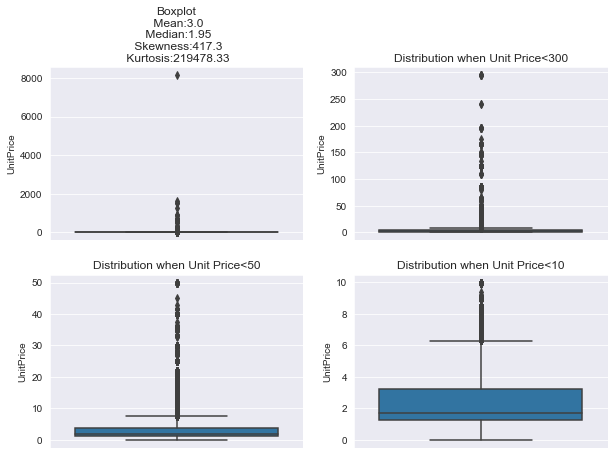

In [56]:
# Looking the distribution of column Unit Price
plt.figure(figsize=(10,7))

skewness = round(A1.UnitPrice.skew(),2)
kurtosis = round(A1.UnitPrice.kurtosis(),2)
mean = round(np.mean(A1.UnitPrice),0)
median = np.median(A1.UnitPrice)

plt.subplot(2,2,1)
sns.boxplot(y=A1.UnitPrice)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=A1[A1.UnitPrice<300]['UnitPrice'])
plt.title('Distribution when Unit Price<300')

plt.subplot(2,2,3)
sns.boxplot(y=A1[A1.UnitPrice<50]['UnitPrice'])
plt.title('Distribution when Unit Price<50')

plt.subplot(2,2,4)
sns.boxplot(y=A1[A1.UnitPrice<10]['UnitPrice'])
plt.title('Distribution when Unit Price<10')

plt.show()

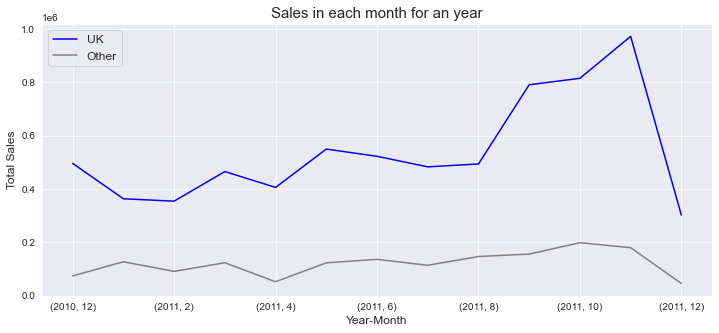

In [57]:
plt.figure(figsize=(12,5))
A1[A1['Country']=='United Kingdom'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
A1[A1['Country']=='Others'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

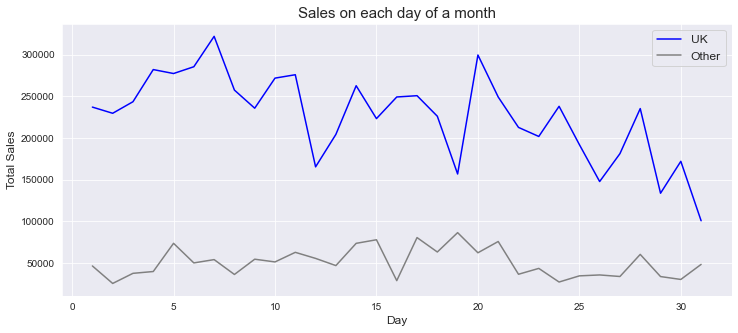

In [58]:
plt.figure(figsize=(12,5))
A1[A1['Country']=='United Kingdom'].groupby(['day'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
A1[A1['Country']=='Others'].groupby(['day'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales on each day of a month', size=15)
plt.legend(fontsize=12)
plt.show()


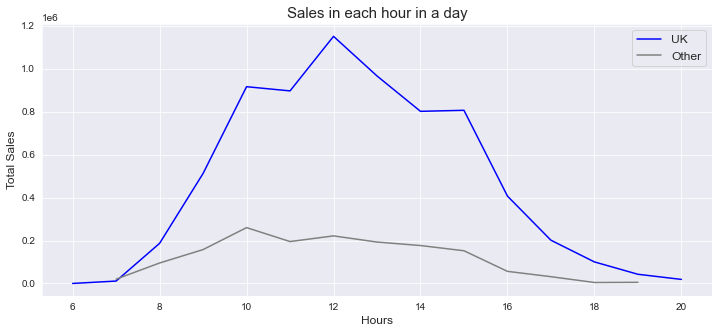

In [59]:
plt.figure(figsize=(12,5))
A1[A1['Country']=='United Kingdom'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
A1[A1['Country']=='Others'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()

# Cohort Analysis
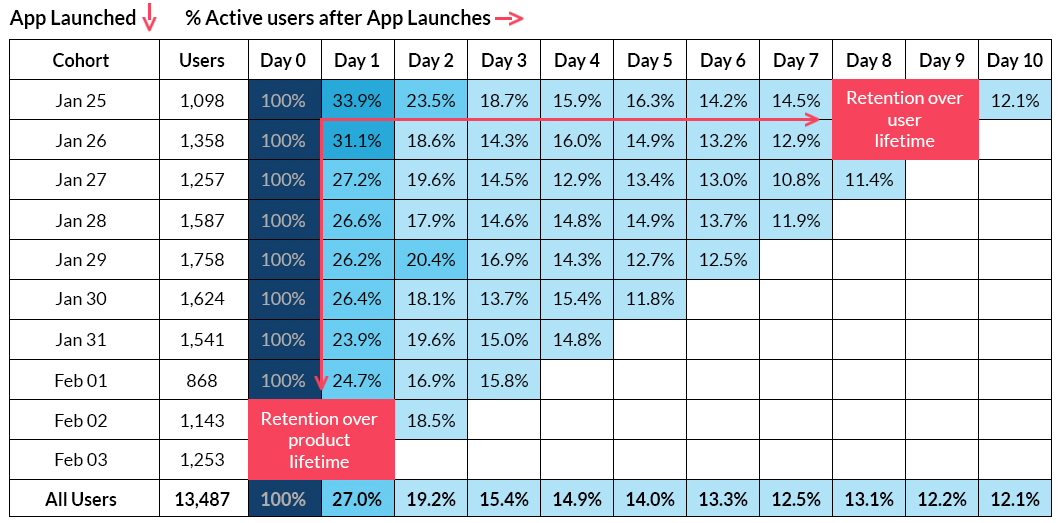

An analytical techniques that focuses on analyzing the behavior of a group of users/customers over time, thereby uncovering insights about the experiences of those customers, and what companies can do to better those experiences.

In [60]:
# copying the data into new df
A1_cohort = A1.copy()
# select only limited columns
A1_cohort = A1_cohort.iloc[:,:9]
A1_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#For cohort analysis, there are a few labels that we have to create:
#Invoice Month: A string representation of the year and month of a single transaction/invoice.
#Cohort Month: A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.
#Cohort period: A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.

In [63]:
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

A1_cohort['InvoiceMonth'] = A1_cohort['InvoiceDate'].dt.strftime('%Y-%m')
# converting the variable to datetime format
A1_cohort['InvoiceMonth'] = pd.to_datetime(A1_cohort['InvoiceMonth'])

In [64]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

A1_cohort['CohortMonth'] = A1_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
# converting the variable to datetime format
A1_cohort['CohortMonth'] = pd.to_datetime(A1_cohort['CohortMonth'])

In [65]:
A1_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392351 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392351 non-null  object        
 1   StockCode     392351 non-null  object        
 2   Description   392351 non-null  object        
 3   Quantity      392351 non-null  int64         
 4   InvoiceDate   392351 non-null  datetime64[ns]
 5   UnitPrice     392351 non-null  float64       
 6   CustomerID    392351 non-null  float64       
 7   Country       392351 non-null  object        
 8   Amount        392351 non-null  float64       
 9   InvoiceMonth  392351 non-null  datetime64[ns]
 10  CohortMonth   392351 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 35.9+ MB


In [66]:
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)

A1_cohort['CohortPeriod'] = diff_month(A1_cohort['InvoiceMonth'], A1_cohort['CohortMonth'])

In [67]:
A1_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceMonth,CohortMonth,CohortPeriod
185327,552804,84879,ASSORTED COLOUR BIRD ORNAMENT,8,2011-05-11 12:32:00,1.69,15615.0,United Kingdom,13.52,2011-05-01,2010-12-01,5
372849,569249,23190,BUNDLE OF 3 SCHOOL EXERCISE BOOKS,12,2011-10-03 10:15:00,1.65,14092.0,United Kingdom,19.80,2011-10-01,2010-12-01,10
411935,572240,22193,RED DINER WALL CLOCK,2,2011-10-21 15:18:00,8.50,13709.0,United Kingdom,17.00,2011-10-01,2011-01-01,9
118597,546440,22115,METAL SIGN EMPIRE TEA,6,2011-03-14 10:31:00,2.95,16871.0,United Kingdom,17.70,2011-03-01,2011-03-01,0
467638,576364,21900,"KEY FOB , SHED",1,2011-11-14 17:40:00,0.65,15009.0,United Kingdom,0.65,2011-11-01,2011-11-01,0


In [68]:
customer_cohort = A1_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID', aggfunc='nunique')
customer_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,884.0,323.0,286.0,339.0,321.0,352.0,320.0,308.0,312.0,349.0,330.0,444.0,234.0
2011-01-01,415.0,91.0,111.0,96.0,132.0,120.0,103.0,100.0,124.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,109.0,103.0,94.0,97.0,104.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,67.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,63.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,80.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,187.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Retention table

cohort_size = customer_cohort.iloc[:,0]
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-01,100.0,36.5,32.4,38.3,36.3,39.8,36.2,34.8,35.3,39.5,37.3,50.2,26.5
2011-01-01,100.0,21.9,26.7,23.1,31.8,28.9,24.8,24.1,29.9,32.8,36.6,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.7,27.1,24.7,25.5,27.4,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,14.8,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.0,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.1,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.2,20.9,22.5,27.3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,23.4,30.1,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
The above table is nothing but showing value in percentages.

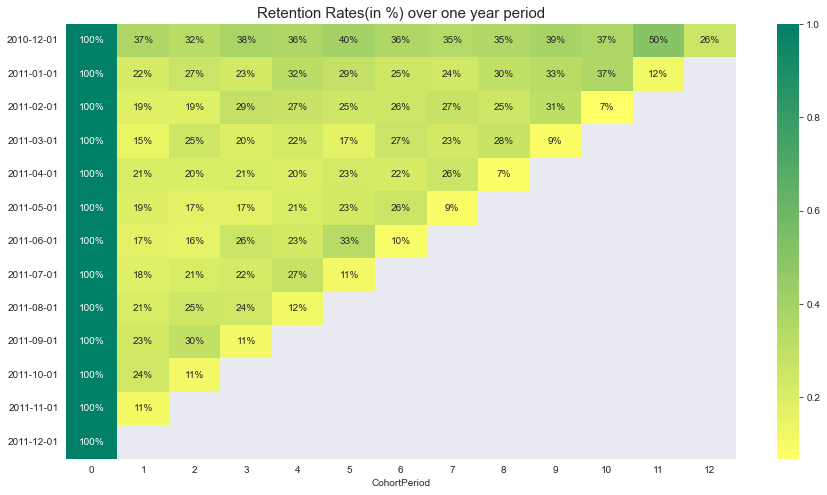

In [70]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(15, 8))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
    

In [71]:
amount_cohort = A1_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Amount', aggfunc='mean').round(2)
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.23,27.28,26.87,26.90,21.16,28.14,28.29,27.40,28.99,33.44,33.73,23.56,25.8
2011-01-01,19.79,24.47,20.98,28.66,22.40,26.29,25.25,25.39,19.09,21.14,19.73,19.78,NaN
2011-02-01,18.00,20.30,20.49,19.49,17.69,16.97,22.33,22.61,18.80,22.19,23.50,NaN,NaN
2011-03-01,17.55,20.35,22.58,18.03,20.96,19.00,22.04,19.68,16.80,13.19,NaN,NaN,NaN
2011-04-01,16.89,20.85,19.50,18.74,19.55,15.00,15.25,15.97,12.34,NaN,NaN,NaN,NaN
2011-05-01,19.90,17.36,22.29,20.91,18.61,14.11,17.02,14.06,NaN,NaN,NaN,NaN,NaN
2011-06-01,24.00,16.31,19.95,20.46,15.35,16.32,13.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.88,23.53,11.80,13.03,10.90,11.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.52,13.16,12.53,15.89,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:
The above table shows the average amount spent by the group of customers over the period of time.

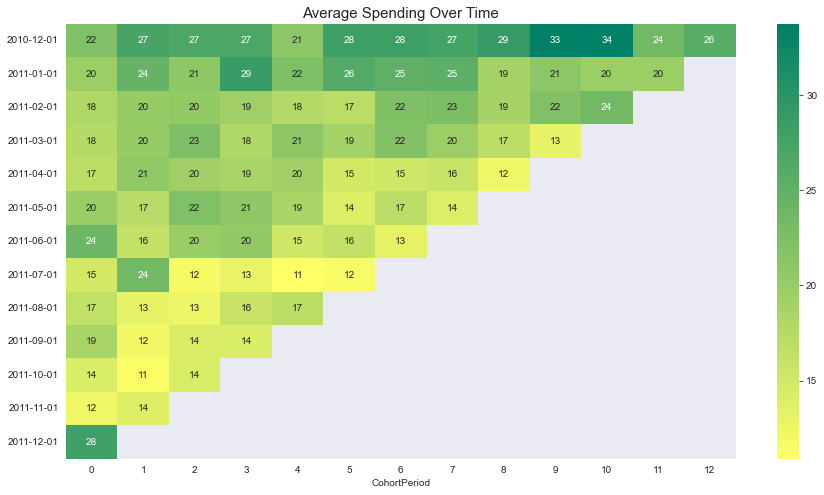

In [72]:
#Build the heatmap or pictorial representation of above table

amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = amount_cohort, annot = True, cmap="summer_r")
plt.show()

# RFM Analysis

In [76]:
# copying the data in other df
A1_rfm = A1.copy()
# keeping only desired columns
A1_rfm = A1_rfm.iloc[:,:9]
A1_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [77]:
# extracting the RECENCY

recency = pd.DataFrame(A1_rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date
recency['MaxDate'] = recency['InvoiceDate'].max()
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency = recency[['CustomerID','recency']]
recency.head()

,CustomerID,recency
0,12347.0,3
1,12348.0,76
2,12349.0,19
3,12350.0,311
4,12352.0,37


In [78]:
# extracting the FREQUENCY

frequency = pd.DataFrame(A1_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
frequency.columns = ['fCustomerID','frequency']
frequency.head()

,fCustomerID,frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7


In [79]:
# extracting the MONETARY

monetary = pd.DataFrame(A1_rfm.groupby('CustomerID')['Amount'].sum().reset_index())
monetary.columns = ['mCustomerID','monetary']
monetary.head()

,mCustomerID,monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1665.74


In [80]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm.head(10)

,CustomerID,recency,frequency,monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74
5,12353.0,205,1,89.00
6,12354.0,233,1,1079.40
7,12355.0,215,1,459.40
8,12356.0,23,3,2811.43
9,12357.0,34,1,6207.67


In [81]:
# checking the overall highlights. The number of distinct customers are 4334
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4334 non-null   float64
 1   recency     4334 non-null   int64  
 2   frequency   4334 non-null   int64  
 3   monetary    4334 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.6 KB


In [83]:
# checking the summary
rfm.describe()

,CustomerID,recency,frequency,monetary
count,4334.000000,4334.000000,4334.000000,4334.000000
mean,15299.461698,93.171897,4.258191,1981.251445
std,1721.689380,100.122257,7.658263,8527.197292
min,12347.000000,1.000000,1.000000,0.000000
25%,13812.250000,18.000000,1.000000,305.867500
50%,15297.500000,51.000000,2.000000,666.875000
75%,16778.750000,143.000000,5.000000,1649.155000
max,18287.000000,374.000000,206.000000,280206.020000


In [84]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,18,51,143,264,375], labels=[5,4,3,2,1])
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,5,9,210], labels=[1,2,3,4,5])
rfm['frequency_score'] = rfm['frequency_score'].astype('int')
rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[-1,306,667,1650,3614,290000], labels=[1,2,3,4,5])
rfm['monetary_score'] = rfm['monetary_score'].astype('int')

In [85]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4334 non-null   float64
 1   recency          4334 non-null   int64  
 2   frequency        4334 non-null   int64  
 3   monetary         4334 non-null   float64
 4   recency_score    4334 non-null   int32  
 5   frequency_score  4334 non-null   int32  
 6   monetary_score   4334 non-null   int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 186.4 KB


In [86]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score'])
rfm['score'] = rfm.apply(score_rfm,axis=1 )
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
0,12347.0,3,7,4310.00,5,4,5,14.0
1,12348.0,76,4,1797.24,3,3,4,10.0
2,12349.0,19,1,1757.55,4,1,4,9.0
3,12350.0,311,1,334.40,1,1,2,4.0
4,12352.0,37,7,1665.74,4,4,4,12.0


In [87]:
rfm.score.describe()

count    4334.000000
mean        8.413013
std         3.309021
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        15.000000
Name: score, dtype: float64

In [88]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways

rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,6,8,11,13,16], labels=['Bad','Bronze','Silver','Gold','Platinum'])
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,customer_type
0,12347.0,3,7,4310.00,5,4,5,14.0,Platinum
1,12348.0,76,4,1797.24,3,3,4,10.0,Silver
2,12349.0,19,1,1757.55,4,1,4,9.0,Silver
3,12350.0,311,1,334.40,1,1,2,4.0,Bad
4,12352.0,37,7,1665.74,4,4,4,12.0,Gold


In [89]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

Bad         33.0
Silver      28.0
Bronze      20.0
Gold        10.0
Platinum     9.0
Name: customer_type, dtype: float64

In [90]:
# looking the RFM value for each of the category
rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

,recency,frequency,monetary
customer_type,,,
Bad,188.0,1.0,297.0
Bronze,78.0,2.0,621.0
Silver,44.0,4.0,1416.0
Gold,20.0,7.0,2863.0
Platinum,10.0,19.0,12111.0


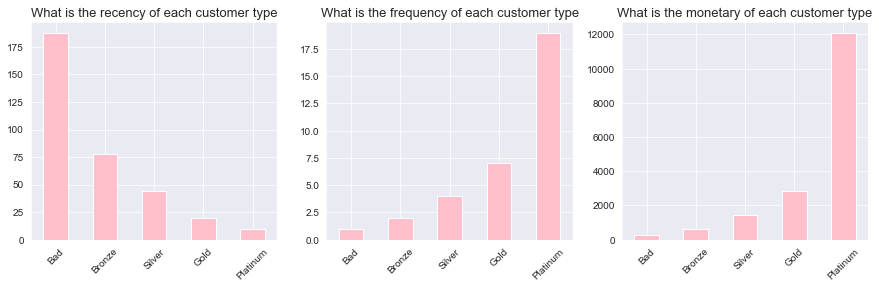

In [91]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    rfm.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='pink')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

# k-Means Clustering

In [93]:
# copying the data into new variable
A1_kmeans = rfm.copy()
# taking only relevant columns
A1_kmeans = A1_kmeans.iloc[:,:4]
A1_kmeans.head()

,CustomerID,recency,frequency,monetary
0,12347.0,3,7,4310.00
1,12348.0,76,4,1797.24
2,12349.0,19,1,1757.55
3,12350.0,311,1,334.40
4,12352.0,37,7,1665.74


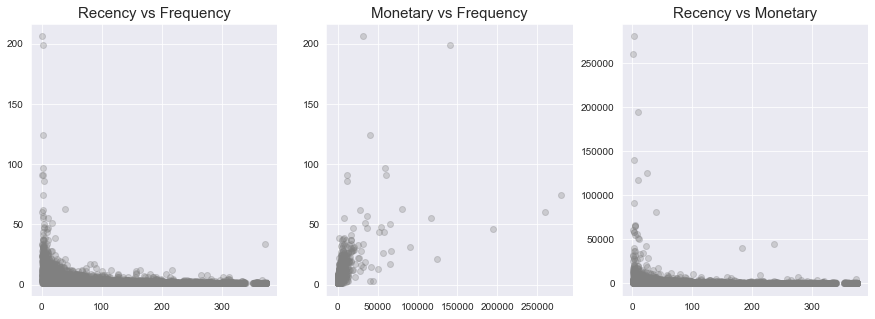

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(A1_kmeans.recency, A1_kmeans.frequency, color='grey', alpha=0.3)
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(A1_kmeans.monetary, A1_kmeans.frequency, color='grey', alpha=0.3)
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(A1_kmeans.recency, A1_kmeans.monetary, color='grey', alpha=0.3)
plt.title('Recency vs Monetary', size=15)
plt.show()

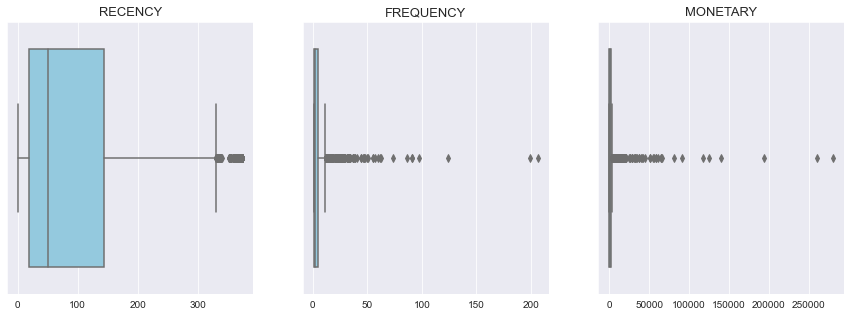

In [97]:
# checking the distribution of the variables

column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(A1_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()


In [99]:
# Removing outliers for Monetary
Q1 = A1_kmeans.monetary.quantile(0.05)
Q3 = A1_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
A1_kmeans = A1_kmeans[(A1_kmeans.monetary >= Q1 - 1.5*IQR) & (A1_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = A1_kmeans.recency.quantile(0.05)
Q3 = A1_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
A1_kmeans = A1_kmeans[(A1_kmeans.recency >= Q1 - 1.5*IQR) & (A1_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = A1_kmeans.frequency.quantile(0.05)
Q3 = A1_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
A1_kmeans = A1_kmeans[(A1_kmeans.frequency >= Q1 - 1.5*IQR) & (A1_kmeans.frequency <= Q3 + 1.5*IQR)]


In [100]:
# resetting the index
A1_kmeans = A1_kmeans.reset_index(drop=True)
A1_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4259 entries, 0 to 4258
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4259 non-null   float64
 1   recency     4259 non-null   int64  
 2   frequency   4259 non-null   int64  
 3   monetary    4259 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 133.2 KB


In [101]:
# looking at random 5 rows
A1_kmeans.sample(5)

,CustomerID,recency,frequency,monetary
2500,15811.0,23,6,2218.62
4135,18119.0,368,1,180.70
2033,15180.0,368,1,87.50
2031,15178.0,261,1,40.50
2556,15894.0,254,2,257.60


In [102]:
# removing customer id as it will not used in making cluster
A1_kmeans = A1_kmeans.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
A1_kmeans_norm = standard_scaler.fit_transform(A1_kmeans)

# converting it into dataframe
A1_kmeans_norm = pd.DataFrame(A1_kmeans_norm)
A1_kmeans_norm.columns = ['recency','frequency','monetary']
A1_kmeans_norm.head()

,recency,frequency,monetary
0,-0.912760,0.877595,1.680623
1,-0.184490,0.098534,0.272852
2,-0.753139,-0.680528,0.250616
3,2.159940,-0.680528,-0.546702
4,-0.573566,0.877595,0.199179


In [103]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(A1_kmeans_norm)

KMeans(n_clusters=5)

In [104]:
# checking the labels
model_clus5.labels_

array([4, 1, 0, ..., 0, 4, 1])

In [105]:
A1_kmeans['clusters'] = model_clus5.labels_
A1_kmeans.head()

,recency,frequency,monetary,clusters
0,3,7,4310.00,4
1,76,4,1797.24,1
2,19,1,1757.55,0
3,311,1,334.40,2
4,37,7,1665.74,1


In [106]:
A1_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,55.0,2.0,574.0
1,34.0,6.0,2014.0
2,254.0,1.0,434.0
3,14.0,18.0,8775.0
4,24.0,11.0,4297.0


Optimal Number of Clusters above shown